# Análise dos Filmes exibidos no Brasil entre 2009 e 2018

Com base nos dados da Ancine, vamos Analisar os filmes brasileiros e estrangeiros exibidos no Brasil!
Dados extraídos do site: (https://oca.ancine.gov.br/cinema)

Arquivo -> filmes_2009_2018.xlsx

In [1]:
# Importando bibliotecas e matplotlib inline
import pandas as pd
%matplotlib inline

In [11]:
# Criando Dataframe com base no Excel
# Precisamos pular as 2 primeiras linhas do arquivo, pois tem cabeçalho e as 16 últimas, pois tem rodapé

df = pd.read_excel('filmes_2009_2018.xlsx', skiprows=2, skipfooter=16)
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2009,2012,E1600546500000,Ficção,Estados Unidos,Estrangeira,2009-11-13 00:00:00,Sony,Distribuição Internacional,5056558,42950999.00
1,2009,007 Quantum of Solace,E1402431200000,Ficção,"Estados Unidos, Inglaterra",Estrangeira,2008-11-07 00:00:00,Sony,Distribuição Internacional,8672,44151.00
2,2009,1983.. O Ano Azul,B0901024500000,Documentário,Brasil,Brasileira,2009-06-05 00:00:00,Prana Filmes,Distribuição Nacional,2313,23001.98
3,2009,2 Filhos de Francisco: A História de Zezé Di C...,B0500302600000,Ficção,Brasil,Brasileira,2005-08-19 00:00:00,Sony,Distribuição Internacional,75,225.00
4,2009,23 Anos em 7 Segundos: 1977 - O Fim do Jejum C...,B0901028800000,Documentário,Brasil,Brasileira,2009-06-26 00:00:00,Fox,Distribuição Internacional,1718,14936.00


In [18]:
df.tail()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
6393,2018,Imagens Do Estado Novo 1937-45,B1600193300000,Documentário,Brasil,Brasileira,2018-03-15 00:00:00,Brasil 1500,Distribuição Nacional,2701,39625.0
6394,2018,O Jabuti E A Anta,B1700090400000,Documentário,Brasil,Brasileira,2018-03-23 00:00:00,Taturana,Distribuição Nacional,202,1905.0
6395,2018,O Muro,B1800247400000,Documentário,Brasil,Brasileira,2018-06-07 00:00:00,Espiral,Distribuição Nacional,205,2661.0
6396,2018,Parquelândia,B1800487600000,Documentário,Brasil,Brasileira,2018-11-08 00:00:00,Taturana,Distribuição Nacional,18,190.0
6397,2018,Quem Mora Lá,B1800396500000,Documentário,Brasil,Brasileira,2018-11-20 00:00:00,Califórnia/Taturana,Distribuição Nacional,65,779.0


In [20]:
# Tipo dos campos de cada coluna
df.dtypes

Ano de exibição                      int64
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [21]:
# Converter coluna Data de lançamento para Data
df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])

ParserError: Unknown string format: Relançamento

In [22]:
# Tenta identificar o problema da coluna Data de lançamento
df['Data de lançamento'].value_counts()

Relançamento           175
2012-12-21 00:00:00     33
2015-12-03 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
                      ... 
2017-12-02 00:00:00      1
2020-12-12 00:00:00      1
2008-10-04 00:00:00      1
2013-06-15 00:00:00      1
2014-10-01 00:00:00      1
Name: Data de lançamento, Length: 821, dtype: int64

In [23]:
# Exibe alguns filmes que tem a data de lançamento igual a 'Relançamento'
df[df['Data de lançamento'] == 'Relançamento'].head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
10,2009,A agenda,E1600634500000,Ficção,França,Estrangeira,Relançamento,Imovision,Distribuição Nacional,33,154.5
248,2009,Fome de Viver,E1600228600000,Ficção,Reino Unido,Estrangeira,Relançamento,Filmes do Estação,Distribuição Nacional,268,944.0
426,2009,Os Contos de Canterbury,E1600589800000,Ficção,Itália,Estrangeira,Relançamento,Pandora,Distribuição Nacional,5026,29614.0
474,2009,Ratatouille,E1500365600000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,230,2300.0
506,2009,Sofá Cama,E1600624100000,Ficção,Argentina,Estrangeira,Relançamento,Panda Filmes,Distribuição Nacional,579,3529.6


## Decisão sobre dados incorretos/faltantes/divergentes
Excluiremos as 175 linhas que contem Data de lançamento como Relançamento

In [33]:
# Mostra o tamanho do dataframe original
df.shape

(6398, 11)

In [34]:
df_novo = df[df['Data de lançamento'] != 'Relançamento'].copy()

In [35]:
df_novo.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2009,2012,E1600546500000,Ficção,Estados Unidos,Estrangeira,2009-11-13 00:00:00,Sony,Distribuição Internacional,5056558,42950999.00
1,2009,007 Quantum of Solace,E1402431200000,Ficção,"Estados Unidos, Inglaterra",Estrangeira,2008-11-07 00:00:00,Sony,Distribuição Internacional,8672,44151.00
2,2009,1983.. O Ano Azul,B0901024500000,Documentário,Brasil,Brasileira,2009-06-05 00:00:00,Prana Filmes,Distribuição Nacional,2313,23001.98
3,2009,2 Filhos de Francisco: A História de Zezé Di C...,B0500302600000,Ficção,Brasil,Brasileira,2005-08-19 00:00:00,Sony,Distribuição Internacional,75,225.00
4,2009,23 Anos em 7 Segundos: 1977 - O Fim do Jejum C...,B0901028800000,Documentário,Brasil,Brasileira,2009-06-26 00:00:00,Fox,Distribuição Internacional,1718,14936.00


In [36]:
# Mostra o tamanho do dataframe sem os dados de 'Relançamento'
df_novo.shape

(6223, 11)

In [37]:
# Verifica se retiramos apenas as 175 ocorrências
6398 - 6223

175

In [39]:
# Verifica se os tipos das colunas do novo dataframe está correto
df_novo.dtypes

Ano de exibição                      int64
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [41]:
# Converter coluna Data de lançamento para Data
df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'])

In [42]:
df_novo.dtypes

Ano de exibição                             int64
Título da obra                             object
CPB/ROE                                    object
Gênero                                     object
País(es) produtor(es) da obra              object
Nacionalidade da obra                      object
Data de lançamento                 datetime64[ns]
Distribuidora                              object
Origem da empresa distribuidora            object
Público no ano de exibição                  int64
Renda (R$) no ano de exibição             float64
dtype: object

In [43]:
df_novo['Data de lançamento'].value_counts()

2015-12-03    33
2012-12-21    33
2013-11-29    29
2012-11-02    27
2017-11-30    25
              ..
2015-11-01     1
2003-12-26     1
2016-10-10     1
2008-05-02     1
2008-02-15     1
Name: Data de lançamento, Length: 820, dtype: int64

In [44]:
# Quais os anos com mais lançamentos?
df_novo['Data de lançamento'].dt.year.value_counts()

2013    673
2017    664
2015    660
2016    634
2014    625
2011    553
2012    541
2009    504
2018    492
2010    476
2008    225
2007     61
2006     49
2005     29
2004     10
2002      6
2001      5
2003      4
1999      3
2019      3
2000      2
2020      1
1978      1
1987      1
1998      1
Name: Data de lançamento, dtype: int64

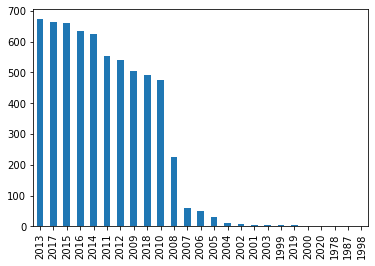

In [45]:
# Plota gráfico
df_novo['Data de lançamento'].dt.year.value_counts().plot.bar()

In [46]:
# Mostra a linha que contem o maior valor de Renda no ano de exibição
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].max()]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
5848,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280,238020232.0


In [50]:
# Outra função que retorna os filmes com maiores renda no ano de exibição
df_novo.nlargest(10, 'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
5848,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280,2.380202e+08
4206,2015,Vingadores: A Era de Ultron,E1500563200000,Ficção,Estados Unidos,Estrangeira,2015-04-23,Disney,Distribuição Internacional,10129071,1.461849e+08
5840,2018,Os Incríveis 2,E1800037700000,Animação,Estados Unidos,Estrangeira,2018-06-28,Disney,Distribuição Internacional,9809291,1.450118e+08
4411,2016,Capitão América: Guerra civil,E1600129800000,Ficção,Estados Unidos,Estrangeira,2016-04-28,Disney,Distribuição Internacional,9617572,1.433370e+08
4199,2015,Velozes e Furiosos 7,E1500161300000,Ficção,Estados Unidos,Estrangeira,2015-04-02,Universal,Distribuição Internacional,9857946,1.424659e+08
5670,2017,Velozes e Furiosos 8,E1700045600000,Ficção,Estados Unidos,Estrangeira,2017-04-13,Universal,Distribuição Internacional,8505215,1.334237e+08
5352,2017,Liga da Justiça,E1700482600000,Ficção,Estados Unidos,Estrangeira,2017-11-15,Warner,Distribuição Internacional,8442364,1.325756e+08
4368,2016,Batman vs Superman: A Origem da Justiça,E1600053700000,Ficção,Estados Unidos,Estrangeira,2016-03-24,Warner,Distribuição Internacional,8565380,1.324410e+08
5000,2017,A Bela e a Fera (2017),E1600795300000,Ficção,Estados Unidos,Estrangeira,2017-03-16,Disney,Distribuição Internacional,8308489,1.300847e+08
2047,2012,Os Vingadores - The Avengers,E1500275200000,Ficção,Estados Unidos,Estrangeira,2012-04-27,Disney,Distribuição Internacional,10911371,1.295956e+08


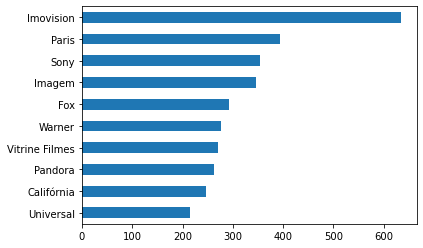

In [56]:
df_novo['Distribuidora'].value_counts(ascending=True)[-10:].plot.barh()

In [70]:
# Retorna os filmes com menores renda no ano de exibição
df_novo.nsmallest(10, 'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
100,2009,As Chaves de Casa,E1600598400000,Ficção,Itália,Estrangeira,2006-01-06,Filmes do Estação,Distribuição Nacional,0,0.0
360,2009,Naufrágio - Mistério e Morte na Catástrofe do ...,B1101495000000,Documentário,Brasil,Brasileira,2009-12-25,Master Shot Produções,Distribuição Nacional,0,0.0
488,2009,Santiago,B0700739200000,Documentário,Brasil,Brasileira,2007-08-24,Videofilmes,Distribuição Nacional,0,0.0
563,2009,"Vamos Subir, Leão",Sem CPB,Documentário,Brasil,Brasileira,2009-03-20,Canal 3,Distribuição Nacional,0,0.0
727,2010,Cine Cocoricó: As Aventuras na Cidade,B0901055900000,Ficção,Brasil,Brasileira,2009-07-17,Moviemobz,Distribuição Nacional,1,0.0
848,2010,Luto Como Mãe,B1101395900000,Documentário,Brasil,Brasileira,2010-08-20,TV Zero Cinema,Distribuição Nacional,0,0.0
1017,2010,Simonal - Ninguém Sabe o Duro que Dei,B0901010000000,Documentário,Brasil,Brasileira,2009-05-15,Moviemobz/RioFilme,Distribuição Nacional,1,0.0
1152,2011,A Última Estrada da Praia,B11013835,Ficção,Brasil,Brasileira,2011-09-16,Okna Produções,Distribuição Nacional,0,0.0
1529,2011,Poema de Salvação,E1600211700000,Ficção,Argentina,Estrangeira,2011-09-30,Canzión filmes,Distribuição Nacional,0,0.0
1533,2011,Porta a porta – A política em dois tempos,B1101435200000,Documentário,Brasil,Brasileira,2011-12-02,Zéfiro Produções,Distribuição Nacional,0,0.0


In [71]:
# Quantos filmes brasileiros e estrangeiros?
df_novo['Nacionalidade da obra'].value_counts()

Estrangeira    4356
Brasileira     1867
Name: Nacionalidade da obra, dtype: int64

In [74]:
# Quantidade de filmes por nacionalidade, os 20 primeiros
df_novo['País(es) produtor(es) da obra'].value_counts()[0:20]

Estados Unidos                 1876
Brasil                         1724
França                          591
Reino Unido                      91
Alemanha                         79
Espanha                          78
Argentina                        76
Itália                           70
Estados Unidos, Reino Unido      69
Japão                            55
Bélgica, França                  54
Inglaterra                       36
França, Itália                   35
Coréia do Sul                    34
Canadá                           33
Argentina, Espanha               29
Suécia                           27
México                           26
Rússia                           26
Alemanha, França                 24
Name: País(es) produtor(es) da obra, dtype: int64

In [85]:
# Abre o help da função
df_novo.count??